In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression ,  Huber
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingRegressor , ExtraTreesRegressor , AdaBoostRegressor
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, accuracy_score
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import TransformedTargetRegressor
from collections import defaultdict
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import datetime 
import calendar

import warnings 
warnings.filterwarnings('ignore')

We are gonna use feature selection features to determine the five most useful features to train the model

In [ ]:
df = pd.read_csv('train.csv', sep = ';')
df.head()

In [17]:
new_df = df.drop(['RSHA', 'SGR', 'ROP', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'], axis=1)
new_df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,1.611410,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,24.612379,NaN,-0.574928,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,1.618070,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,23.895531,NaN,-0.570188,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,1.626459,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,23.916357,NaN,-0.574245,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,1.621594,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,23.793688,NaN,-0.586315,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,1.602679,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,24.104078,NaN,-0.597914,65000,1.0


In [ ]:
dfna = new_df.dropna()
dfna = dfna.drop(['WELL', 'GROUP', 'FORMATION'], axis=1)

Optimal numer of features: 11


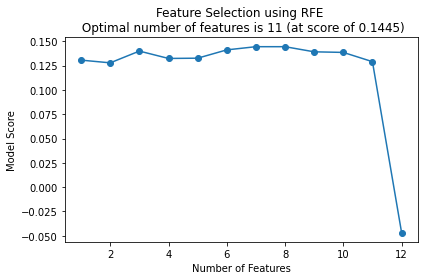

array([4, 5, 6, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:

X = dfna.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
y = dfna['FORCE_2020_LITHOFACIES_LITHOLOGY']

regressor = SVC()
feature_selector = RFECV(regressor, min_features_to_select=5)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

feature_selector.ranking_